#### Solution of ODE without package

$$
\frac{du}{dt} = \alpha u \\
t \in [0,1] \\
\alpha = 1.01 \\
(actual \space solution \space) \space u(t) = u_0 exp(\alpha t) \\
u_0 = 0.5
$$

In [1]:
using Flux
using Statistics
using Plots

In [2]:
model = Chain(t -> [t],
                Dense(1,32,tanh),
                Dense(32,1),
                t -> t[1])

Chain(
  var"#1#3"(),
  Dense(1, 32, tanh),                   # 64 parameters
  Dense(32, 1),                         # 33 parameters
  var"#2#4"(),
)                   # Total: 4 arrays, 97 parameters, 644 bytes.

In [3]:
ϵ = sqrt(eps(Float32))
α = 1.01
lower_bound = 0
upper_bound = 1

predicted(t) = t*model(t) + 0.5

function p(t)
    return ((predicted(t+ϵ)-predicted(t))/ϵ) - α*predicted(t)
end

p (generic function with 1 method)

In [4]:
loss1() = Flux.mse((abs2(p(t)) for t in 0:0.001:1),0)

loss1 (generic function with 1 method)

In [5]:
ps = Flux.params(model)
opt = Flux.ADAM(0.01)
data = Iterators.repeated((),5000)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{}}}(Base.Iterators.Repeated{Tuple{}}(()), 5000)

In [6]:
function my_custom_train!(loss, ps, data, opt)
    local training_loss
    itr = 0
    for d in data
        gs = gradient(ps) do
            training_loss = loss()
            if (itr %500 == 0.0)
                print("Current Loss : ",training_loss,"\n")
            end
            return training_loss
        end
        Flux.Optimise.update!(opt, ps, gs)
        itr += 1;
    end
end

my_custom_train! (generic function with 1 method)

In [7]:
my_custom_train!(loss1, ps, data, opt)

Current Loss : 0.049830932069308345
Current Loss : 6.5531551841090295e-6
Current Loss : 5.866053305816363e-6
Current Loss : 5.166380168940022e-6
Current Loss : 4.540428798212222e-6
Current Loss : 4.003778254719639e-6
Current Loss : 3.5345254996976816e-6
Current Loss : 3.080680839887637e-6
Current Loss : 2.5360578199061666e-6
Current Loss : 1.7121322912615685e-6


In [8]:
function analytic_solution(t)
    u0 = 0.5
    α = 1.01
    return u0*exp(α*t)
end

analytic_solution (generic function with 1 method)

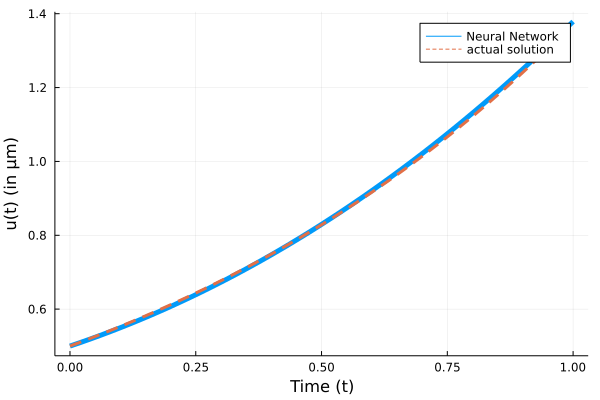

In [9]:
t1 = 0:0.02:1
plot(t1,predicted.(t1),linewidth = 5,label = "Neural Network",xaxis="Time (t)",yaxis="u(t) (in μm)")
plot!(t1,analytic_solution.(t1),lw=3,ls=:dash,label = "actual solution")

In [10]:
print(predicted(1))

1.378796398639679

In [11]:
print(analytic_solution(1))

1.3728005075084582

### ODE using DifferentialEquations package

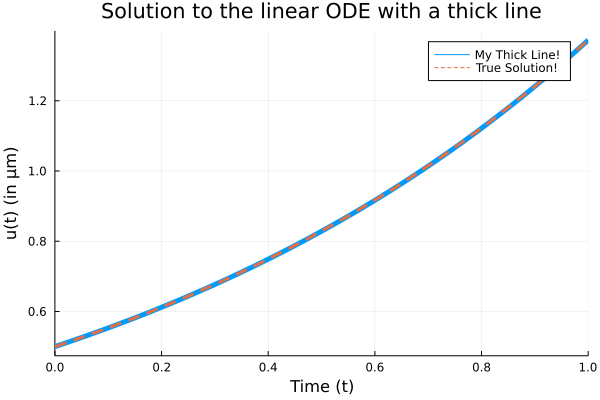

In [1]:
using DifferentialEquations
f(u,p,t) = 1.01*u
u0 = 1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

using Plots
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false
plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")